In [1]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from collections import Counter, defaultdict
import random
import datetime as dt
import matplotlib


## Data Analysis

In [2]:
News = pd.read_csv('./data/RedditNews.csv', error_bad_lines=True)
Stock = pd.read_csv('./data/DJIA_table.csv', error_bad_lines=True)
Stock.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2016-07-01,17924.240234,18002.380859,17916.910156,17949.369141,82160000,17949.369141
1,2016-06-30,17712.759766,17930.609375,17711.800781,17929.990234,133030000,17929.990234
2,2016-06-29,17456.019531,17704.509766,17456.019531,17694.679688,106380000,17694.679688
3,2016-06-28,17190.509766,17409.720703,17190.509766,17409.720703,112190000,17409.720703
4,2016-06-27,17355.210938,17355.210938,17063.080078,17140.240234,138740000,17140.240234


### News Data

In [3]:
News.head()

,Date,News
0,2016-07-01,A 117-year-old woman in Mexico City finally re...
1,2016-07-01,IMF chief backs Athens as permanent Olympic host
2,2016-07-01,"The president of France says if Brexit won, so..."
3,2016-07-01,British Man Who Must Give Police 24 Hours' Not...
4,2016-07-01,100+ Nobel laureates urge Greenpeace to stop o...


##### Word counts

In [4]:
# counts of words
counts = Counter()
for story in News['News']:
    list_of_words = story.split(' ')
    for word in list_of_words:
        counts[word] += 1

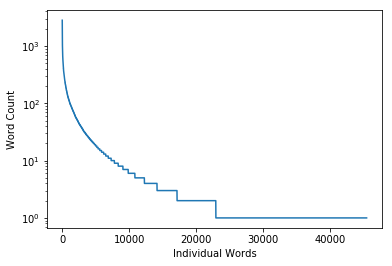

In [89]:
# sparsity of all words

count_vals = list(counts.values())
count_vals.sort()
count_vals.reverse()
plt.yscale('log')
plt.ylabel('Word Count')
plt.xlabel('Individual Words')
plt.plot(count_vals)
plt.savefig('foo.png', dpi=150)

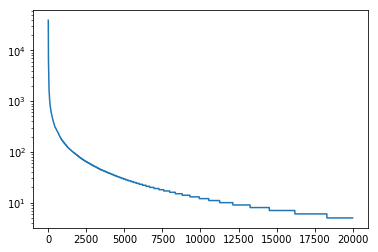

In [6]:
plt.yscale('log')
plt.ylabel('Word Count')
plt.xlabel('Individual Words')
plt.plot(count_vals[:20000])

### Stock Data

In [18]:
Stock.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2016-07-01,17924.240234,18002.380859,17916.910156,17949.369141,82160000,17949.369141
1,2016-06-30,17712.759766,17930.609375,17711.800781,17929.990234,133030000,17929.990234
2,2016-06-29,17456.019531,17704.509766,17456.019531,17694.679688,106380000,17694.679688
3,2016-06-28,17190.509766,17409.720703,17190.509766,17409.720703,112190000,17409.720703
4,2016-06-27,17355.210938,17355.210938,17063.080078,17140.240234,138740000,17140.240234


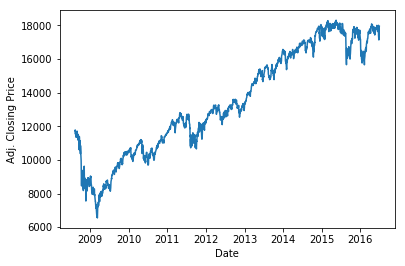

In [21]:
dates = list(Stock.Date)
prices = list(Stock['Adj Close'])


date_objs = [dt.datetime.strptime(d,'%Y-%m-%d').date() for d in dates]
plt.ylabel('Adj. Closing Price')
plt.xlabel('Date')
plt.plot(date_objs, prices)
plt.savefig('foo.png', dpi=150)

In [49]:
custom_labels = []
is_0=0
is_1=0
for i in range(len(prices)-1):
    custom_labels.append(int(prices[i]<=prices[i+1]))
    if prices[i]<=prices[i+1]: is_1 +=1
    else: is_0 +=1
print(is_1,is_0)
print(len(custom_labels))

923 1065
1988


At first I though about normalizing this but then realized that this is not a good idea and thought that this could be a model built for a bull market.

Text(0, 0.5, 'Count')

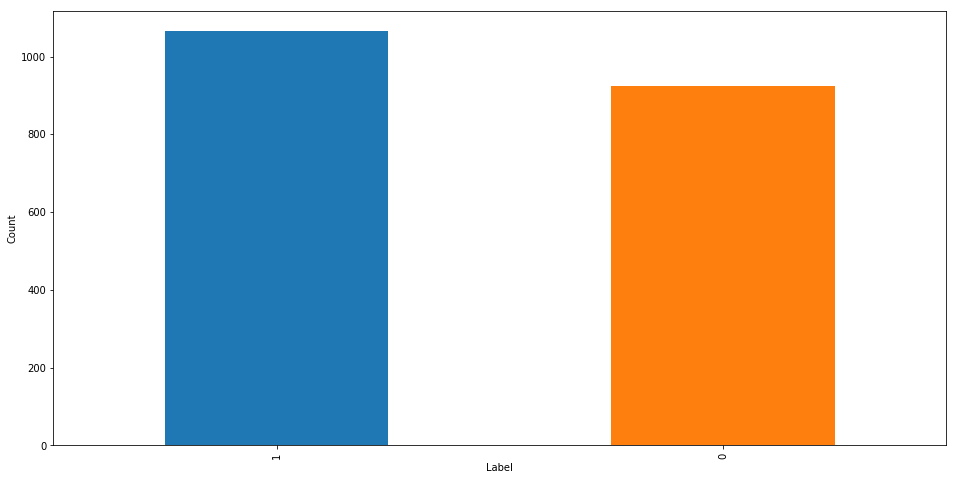

In [48]:
Comb = pd.read_csv('data/Combined_News_DJIA.csv')
fig = pd.value_counts(Comb['Label']).plot.bar(figsize=(16, 8))
fig.set_xlabel('Label')
fig.set_ylabel('Count')


### Totally Naieve 

In [68]:
# load data and shift labels
DataSet = pd.merge(Stock[['Date', 'Adj Close']],Comb,on='Date', copy=True)
#Stock['Date','Adj Close']
DataSet.Label = DataSet.Label.shift(1)
DataSet = DataSet[1:]

# randomize
Random_Data = DataSet.sample(frac=1)

TRAIN_SPLIT = 0.9

average_acc = 0.0
for _ in range(10):
    Random_Data = DataSet.sample(frac=1)
    Train = Random_Data[:int(len(Random_Data)*TRAIN_SPLIT)].reset_index(drop=True)
    Test = Random_Data[-(int(len(Random_Data)*(1-TRAIN_SPLIT))):].reset_index(drop=True)
    
    ones = sum(list(Test.Label))
    print('Run',_,'accuracy:',ones/len(Test))
    average_acc += ones/len(Test)
print()
print('Average accuracy:', average_acc/10)



Run 0 accuracy: 0.5
Run 1 accuracy: 0.5606060606060606
Run 2 accuracy: 0.5505050505050505
Run 3 accuracy: 0.5454545454545454
Run 4 accuracy: 0.46464646464646464
Run 5 accuracy: 0.5505050505050505
Run 6 accuracy: 0.47474747474747475
Run 7 accuracy: 0.48484848484848486
Run 8 accuracy: 0.5454545454545454
Run 9 accuracy: 0.5353535353535354

Average accuracy: 0.5212121212121212


## Data Preprocessing

##### Realignment

The provided labels align with the current day when they should actually align with the previous day, since we are trying to guess if there is a information in the news that can detect stock market movement on the following day.

In [69]:
DataSet = pd.merge(Stock[['Date', 'Adj Close']],Comb,on='Date', copy=True)
#Stock['Date','Adj Close']
DataSet.Label = DataSet.Label.shift(1)
DataSet = DataSet[1:]
DataSet.head()

,Date,Adj Close,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
1,2016-06-30,17929.990234,1.0,Jamaica proposes marijuana dispensers for tour...,Stephen Hawking says pollution and 'stupidity'...,Boris Johnson says he will not run for Tory pa...,Six gay men in Ivory Coast were abused and for...,Switzerland denies citizenship to Muslim immig...,Palestinian terrorist stabs israeli teen girl ...,Puerto Rico will default on $1 billion of debt...,...,Googles free wifi at Indian railway stations i...,Mounting evidence suggests 'hobbits' were wipe...,The men who carried out Tuesday's terror attac...,Calls to suspend Saudi Arabia from UN Human Ri...,More Than 100 Nobel Laureates Call Out Greenpe...,British pedophile sentenced to 85 years in US ...,"US permitted 1,200 offshore fracks in Gulf of ...",We will be swimming in ridicule - French beach...,UEFA says no minutes of silence for Istanbul v...,Law Enforcement Sources: Gun Used in Paris Ter...
2,2016-06-29,17694.679688,1.0,Explosion At Airport In Istanbul,Yemeni former president: Terrorism is the offs...,UK must accept freedom of movement to access E...,Devastated: scientists too late to captive bre...,British Labor Party leader Jeremy Corbyn loses...,A Muslim Shop in the UK Was Just Firebombed Wh...,Mexican Authorities Sexually Torture Women in ...,...,"Escape Tunnel, Dug by Hand, Is Found at Holoca...",The land under Beijing is sinking by as much a...,Car bomb and Anti-Islamic attack on Mosque in ...,Emaciated lions in Taiz Zoo are trapped in blo...,Rupert Murdoch describes Brexit as 'wonderful'...,More than 40 killed in Yemen suicide attacks,Google Found Disastrous Symantec and Norton Vu...,Extremist violence on the rise in Germany: Dom...,BBC News: Labour MPs pass Corbyn no-confidence...,Tiny New Zealand town with 'too many jobs' lau...
3,2016-06-28,17409.720703,1.0,"2,500 Scientists To Australia: If You Want To ...","The personal details of 112,000 French police ...",S&amp;P cuts United Kingdom sovereign credit r...,Huge helium deposit found in Africa,CEO of the South African state broadcaster qui...,"Brexit cost investors $2 trillion, the worst o...",Hong Kong democracy activists call for return ...,...,"US, Canada and Mexico pledge 50% of power from...",There is increasing evidence that Australia is...,"Richard Branson, the founder of Virgin Group, ...","37,000-yr-old skull from Borneo reveals surpri...",Palestinians stone Western Wall worshipers; po...,Jean-Claude Juncker asks Farage: Why are you h...,"""Romanians for Remainians"" offering a new home...",Brexit: Gibraltar in talks with Scotland to st...,8 Suicide Bombers Strike Lebanon,Mexico's security forces routinely use 'sexual...
4,2016-06-27,17140.240234,1.0,Barclays and RBS shares suspended from trading...,Pope says Church should ask forgiveness from g...,Poland 'shocked' by xenophobic abuse of Poles ...,"There will be no second referendum, cabinet ag...","Scotland welcome to join EU, Merkel ally says",Sterling dips below Friday's 31-year low amid ...,No negative news about South African President...,...,German lawyers to probe Erdogan over alleged w...,"Boris Johnson says the UK will continue to ""in...",Richard Branson is calling on the UK governmen...,Turkey 'sorry for downing Russian jet',Edward Snowden lawyer vows new push for pardon...,Brexit opinion poll reveals majority don't wan...,"Conservative MP Leave Campaigner: ""The leave c...","Economists predict UK recession, further weake...","New EU 'superstate plan by France, Germany: Cr...",Pakistani clerics declare transgender marriage...
5,2016-06-24,17400.750000,0.0,David Cameron to Resign as PM After EU Referendum,BBC forecasts UK votes to Leave the European U...,Nicola Sturgeon says a second independence ref...,It's official. Britain votes to leave the Euro...,World's Largest Tibetan Buddhist Institute Ord...,Not a single place in Scotland voted to leave ...,Rich Getting Richer at the Expense of the Poor.

#### All in one

In [70]:
# turn 'nan's to 'str'
for i in range(1,26):
    DataSet.loc[:,"Top"+str(i)] = DataSet["Top"+str(i)].apply(lambda x : str(x))

In [71]:
# lower case, no punct, remove stops, tokenize

import string
from nltk import word_tokenize
from nltk.corpus import stopwords

stop = stopwords.words('english') + list(string.punctuation) + ['b','``','\'s',"\'\'"]


for i in range(1,26):
    DataSet.loc[:,"Top"+str(i)] = DataSet["Top"+str(i)].apply(lambda x : [i for i in word_tokenize(x.lower()) if i not in stop])

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [77]:
#DataSet.head()

##### View updated sparsity

In [73]:
# counts of words
counts = Counter()
for i in range(1,26):
    for list_of_words in DataSet['Top'+str(i)]:
        for word in list_of_words:
            counts[word] += 1

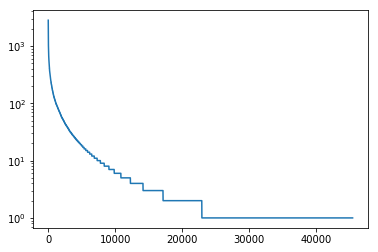

In [74]:
count_vals = list(counts.values())
count_vals.sort()
count_vals.reverse()
plt.yscale('log')
plt.plot(count_vals)

In [78]:
# print most common / least common

sorted_words = sorted(counts.items(), key=lambda x: x[1])

number_of = 20
# least
print('Least Common')
for i in sorted_words[:number_of]: print(i)
print('\nMostCommon')
for i in sorted_words[-number_of:]: print(i)

Least Common
('dispensers', 1)
('desks', 1)
('competed', 1)
('jo', 1)
('flip-flopping', 1)
("'labour", 1)
('bear-inhabited', 1)
('freezer', 1)
('aristotle', 1)
('ms804', 1)
('paris-cairo', 1)
('100,000th', 1)
('hypertension', 1)
('lobbys', 1)
('1.4gb', 1)
('poo-poos', 1)
("'boaty", 1)
('christen', 1)
('boaty', 1)
('starshot', 1)

MostCommon
('country', 1207)
('iran', 1229)
('uk', 1257)
('first', 1285)
('killed', 1302)
('one', 1306)
('u.s.', 1352)
('president', 1370)
('war', 1521)
('years', 1534)
('russia', 1572)
('people', 1871)
('israel', 1879)
('police', 1905)
('china', 1974)
('government', 1999)
('world', 2179)
('new', 2350)
('says', 2561)
('us', 2811)


##### Removal of sparse words

In [90]:
limit = 100
for i in range(1,26):
    DataSet.loc[:,"Top"+str(i)] = DataSet["Top"+str(i)].apply(lambda x : [i for i in x if counts[i] >= limit])
DataSet.head()

,Date,Adj Close,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
1,2016-06-30,17929.990234,1.0,"[marijuana, following, would, give, people, 2,...","[says, pollution, still, biggest, threats, bec...","[says, run, party]","[six, gay, men, ivory, coast, forced, homes, v...","[switzerland, denies, muslim, girls, report]","[palestinian, terrorist, israeli, girl, death]","[1, billion, debt, friday]",...,"[free, indian, better, countrys, paid, services]","[evidence, suggests, years, ago]","[men, tuesday, terror, attack, airport, russia...","[calls, saudi, arabia, un, human, rights, coun...","[100, nobel, call, world]","[british, sentenced, years, us, child, abuse, ...","[us, gulf, mexico, 2010, 2014, allowed, billio...","[french, police, police, first, time, amid, fe...","[says, victims, euro, already]","[law, used, paris, terrorist, attacks]"
2,2016-06-29,17694.679688,1.0,"[explosion, airport]","[former, president, terrorism, al, regime]","[uk, must, freedom, access, eu, market]","[scientists, lost, climate, change, australian...","[british, party, leader, vote, refuses]","[muslim, uk, people, inside]","[mexican, authorities, torture, women, prison]",...,"[hand, found, massacre, site]","[land, beijing, much, four, per, year, accordi...","[car, bomb, attack, mosque, australia]","[left, months, due, civil, war]","[murdoch, media, leaving, eu, prison, break, a...","[40, killed, yemen, suicide, attacks]","[google, found, bad, gets]","[violence, rise, germany, intelligence, agency...","[bbc, news]","[new, zealand, town, many, jobs, launches]"
3,2016-06-28,17409.720703,1.0,"[scientists, australia, want, save, great, sto...","[personal, french, police, officers, google, s...","[amp, cuts, united]","[huge, found, africa]","[south, african, state, news, president, banned]","[cost, 2, worst, one, day, drop, ever]","[hong, kong, democracy, activists, call, retur...",...,"[us, canada, mexico, 50, power, clean, energy]","[evidence, australia, refugees, medical, exper...","[founder, group, said, tuesday, company, lost,...","[reveals, scientists, study, human, discovered...","[palestinians, western, wall, police, shut]",[asks],"[new, home, stay, eu, newspaper, families, all...","[talks, scotland, stay, eu]","[8, suicide, strike, lebanon]","[mexico, security, forces, use, torture, women..."
4,2016-06-27,17140.240234,1.0,[8],"[pope, says, church, past, treatment]","[poland, abuse, uk]","[second, referendum]","[scotland, join, eu, merkel, says]","[friday, low, amid]","[news, south, african, president, allowed, state]",...,"[german, probe, erdogan, alleged, war, crimes]","[says, uk, continue, eu, tells, leave, must, r...","[calling, uk, government, hold, second, eu, re...","[turkey, russian]","[edward, snowden, lawyer, vows, new, push, obama]","[poll, reveals, n't, want, second, eu, referen...","[mp, leave, leave, campaign, n't, plan, ...]","[uk, following]","[new, eu, plan, france, germany, european, pow...","[pakistani, legal, islamic, law]"
5,2016-06-24,17400.750000,0.0,"[david, cameron, pm, eu, referendum]","[bbc, uk, votes, leave, european, union]","[says, second, independence, referendum, scotl...","[official, britain, votes, leave, european, un...","[world, largest, ordered, chinese, government]","[single, place, scotland, leave, eu, ...]","[rich, getting, poor, warns]",...,"[calls, referendum, irish]","[70, billion, australian, result]","[vote, leave, hours, result]","[top, eu, leader, want, britain, soon, possible]","[million, fund, let, give, million, eu, takes,...","[thousands, london, job, cuts, start, next, week]","[google, says, large, irish, news]","[eu, referendum, first, result, night]","[residents, google, eu]","[turkish, man, found, guilty, president, erdog..."


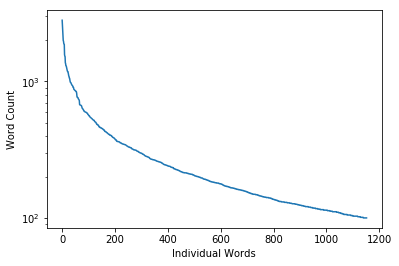

In [88]:
# counts of words
new_counts = Counter()
for i in range(1,26):
    for list_of_words in DataSet['Top'+str(i)]:
        for word in list_of_words:
            new_counts[word] += 1
new_count_vals = list(new_counts.values())
new_count_vals.sort()
new_count_vals.reverse()
plt.yscale('log')
plt.ylabel('Word Count')
plt.xlabel('Individual Words')
plt.plot(new_count_vals)
plt.savefig('foo.png', dpi=150)


In [87]:
# print most common / least common

sorted_words = sorted(new_counts.items(), key=lambda x: x[1])

number_of = 20
# least
print('Least Common')
for i in sorted_words[:number_of]: print(i)
print('\nMostCommon')
for i in sorted_words[-number_of:]: print(i)

Least Common
('qatar', 100)
('countrys', 100)
('push', 100)
('meat', 100)
('drop', 100)
('forest', 100)
('disease', 100)
('early', 100)
('hands', 100)
('offers', 100)
('tens', 100)
('daily', 100)
('towards', 100)
('thailand', 101)
('hiv', 101)
('suggests', 101)
('conditions', 101)
('showing', 101)
('500', 101)
('reactor', 101)

MostCommon
('country', 1207)
('iran', 1229)
('uk', 1257)
('first', 1285)
('killed', 1302)
('one', 1306)
('u.s.', 1352)
('president', 1370)
('war', 1521)
('years', 1534)
('russia', 1572)
('people', 1871)
('israel', 1879)
('police', 1905)
('china', 1974)
('government', 1999)
('world', 2179)
('new', 2350)
('says', 2561)
('us', 2811)


## Model Building

First we need to create a test train split for the dataset

In [91]:
# randomize
Random_Data = DataSet.sample(frac=1)

TRAIN_SPLIT = 0.9

Train = Random_Data[:int(len(Random_Data)*TRAIN_SPLIT)].reset_index(drop=True)
Test = Random_Data[-(int(len(Random_Data)*(1-TRAIN_SPLIT))):].reset_index(drop=True)

print(len(Train))
print(len(Test))


1789
198


## Baseline Model

The baseline model will be an MLE.

Dicts will be made for each word that hold the likellihood of a stock gain on the next day given that words appearance and likelihood of a stock loss on the next given that words appearance.

For each word in a sentence 

In [105]:
class Unigram_Probability_Model(object):
    
    def __init__(self, Train, Test):
        self.model = defaultdict(float)
        self.training_data = Train
        self.test_data = Test

    def train(self):
        #print(len(self.training_data))
        counts = defaultdict(lambda: defaultdict(float))
        
        for index, row in self.training_data.iterrows():
            
            # get the label for the observation
            label = int(row['Label'])
            
            # build counts for the observation
            for i in range(1,26):
                for word in row['Top'+str(i)]:
                    counts[word][label] += 1.0
        
        #print(len(counts))
        for word in counts:
            self.model[word] = counts[word][1]/(counts[word][1]+counts[word][0])
            
            
    def test(self):
        
        self.predicted = []
        self.probability = []

        for index, row in self.test_data.iterrows():
            
            score = 0.0
            count = 0.0
            
            for i in range(1,26):
                for word in row['Top'+str(i)]:
                    if self.model[word] > 0.0:
                        score += self.model[word]
                        count += 1.0
            
            self.probability.append(score/count)
            if (score/count) < 0.500:
                self.predicted.append(0.0)
            else:
                self.predicted.append(1.0)


        y = list(self.test_data['Label'])
        assert len(y) == len(self.predicted)
        
        self.results = defaultdict(float)
        
        for i in range(len(y)):
            self.results[(y[i],self.predicted[i])] += 1.0
            
        
                    
            
            

In [106]:
Base = Unigram_Probability_Model(Train, Test)

In [124]:
# test unigram probability model 10 times
average_acc = 0.0

for _ in range(10):
    # randomize
    Random_Data = DataSet.sample(frac=1)

    # data split
    TRAIN_SPLIT = 0.9

    Train = Random_Data[:int(len(Random_Data)*TRAIN_SPLIT)].reset_index(drop=True)
    Test = Random_Data[-(int(len(Random_Data)*(1-TRAIN_SPLIT))):].reset_index(drop=True)
    Base = Unigram_Probability_Model(Train, Test)
    Base.train()
    Base.test()
    accurate = Base.results[(1.0,1.0)] + Base.results[(0.0,0.0)]
    total =  sum(list(Base.results.values()))
    print('Run',_,'accuracy:',accurate/total)
    average_acc += accurate/total
print() 
print('Average accuracy:', average_acc/10)

Run 0 accuracy: 0.5151515151515151
Run 1 accuracy: 0.5454545454545454
Run 2 accuracy: 0.5757575757575758
Run 3 accuracy: 0.6060606060606061
Run 4 accuracy: 0.5303030303030303
Run 5 accuracy: 0.51010101010101
Run 6 accuracy: 0.5353535353535354
Run 7 accuracy: 0.494949494949495
Run 8 accuracy: 0.5353535353535354
Run 9 accuracy: 0.494949494949495

Average accuracy: 0.5343434343434343


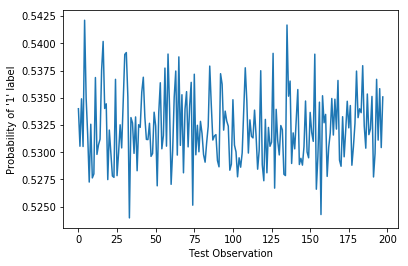

In [123]:
plt.ylabel('Probability of \'1\' label')
plt.xlabel('Test Observation')
plt.plot(Base.probability)
plt.savefig('foo.png', dpi=150)

In [115]:
# test unigram probability model 10 times on the training data iself
average_acc = 0.0

for _ in range(10):
    # randomize
    Random_Data = DataSet.sample(frac=1)

    # data split
    TRAIN_SPLIT = 0.9

    Train = Random_Data[:int(len(Random_Data)*TRAIN_SPLIT)].reset_index(drop=True)
    #Test = Random_Data[-(int(len(Random_Data)*(1-TRAIN_SPLIT))):].reset_index(drop=True)
    Base = Unigram_Probability_Model(Train, Train)
    Base.train()
    Base.test()
    accurate = Base.results[(1.0,1.0)] + Base.results[(0.0,0.0)]
    total =  sum(list(Base.results.values()))
    print('Run',_,'accuracy:',accurate/total)
    average_acc += accurate/total
print()
print('Average accuracy:', average_acc/10)

Run 0 accuracy: 0.5377305757406372
Run 1 accuracy: 0.538848518725545
Run 2 accuracy: 0.5399664617104528
Run 3 accuracy: 0.5382895472330911
Run 4 accuracy: 0.5354946897708217
Run 5 accuracy: 0.5304639463387367
Run 6 accuracy: 0.5321408608160983
Run 7 accuracy: 0.5399664617104528
Run 8 accuracy: 0.5332588038010061
Run 9 accuracy: 0.5349357182783678

Average accuracy: 0.536109558412521


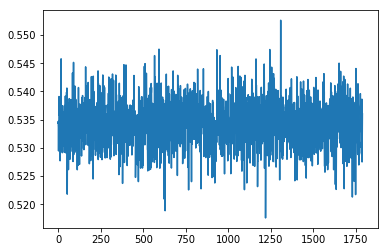

In [116]:
plt.plot(Base.probability)

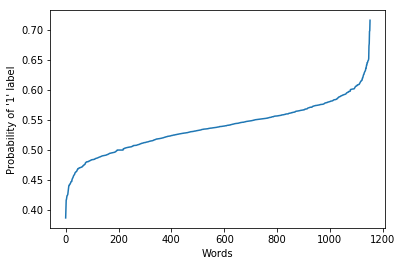

In [125]:
model_values = list(Base.model.values())
model_values.sort()

plt.ylabel('Probability of \'1\' label')
plt.xlabel('Words')
plt.plot(model_values)
plt.savefig('foo.png', dpi=150)

In [137]:
class Normalized_Unigram_Probability_Model(object):
    
    def __init__(self, Train, Test):
        self.model = defaultdict(float)
        self.training_data = Train
        self.test_data = Test

    def train(self):
        #print(len(self.training_data))
        counts = defaultdict(lambda: defaultdict(float))
        
        for index, row in self.training_data.iterrows():
            
            # get the label for the observation
            label = int(row['Label'])
            
            # build counts for the observation
            for i in range(1,26):
                for word in row['Top'+str(i)]:
                    counts[word][label] += 1.0
        
        #print(len(counts))
        for word in counts:
            self.model[word] = counts[word][1]/(counts[word][1]+counts[word][0])
            
            
    def test(self):
        
        self.predicted = []
        self.probability = []

        for index, row in self.test_data.iterrows():
            score = 0.0
            count = 0.0
            for i in range(1,26):
                for word in row['Top'+str(i)]:
                    if self.model[word] > 0.0:
                        score += self.model[word]
                        count += 1.0
            self.probability.append(score/count)
            if (score/count) < 0.500:
                self.predicted.append(0.0)
            #else:
            #    self.predicted.append(1.0)
        
        self.normalized_prob = np.array(self.probability) - np.min(self.probability)
        self.normalized_prob = np.array(self.normalized_prob)/np.max(self.normalized_prob)
        
        for i in self.normalized_prob:

            if i > 0.5:
                self.predicted.append(1.0)
            else:
                self.predicted.append(0.0)
        
                    
        y = list(self.test_data['Label'])
        assert len(y) == len(self.predicted)
        
        self.results = defaultdict(float)
        
        for i in range(len(y)):
            self.results[(y[i],self.predicted[i])] += 1.0
            
        
                    
            

In [144]:
# test unigram probability model 10 times
average_acc = 0.0

for _ in range(10):
    # randomize
    Random_Data = DataSet.sample(frac=1)

    # data split
    TRAIN_SPLIT = 0.9

    Train = Random_Data[:int(len(Random_Data)*TRAIN_SPLIT)].reset_index(drop=True)
    Test = Random_Data[-(int(len(Random_Data)*(1-TRAIN_SPLIT))):].reset_index(drop=True)
    Base = Normalized_Unigram_Probability_Model(Train, Test)
    Base.train()
    Base.test()
    accurate = Base.results[(1.0,1.0)] + Base.results[(0.0,0.0)]
    total =  sum(list(Base.results.values()))
    print('Run',_,'accuracy:',accurate/total)
    average_acc += accurate/total
print() 
print('Average accuracy:', average_acc/10)

Run 0 accuracy: 0.48484848484848486
Run 1 accuracy: 0.5
Run 2 accuracy: 0.5202020202020202
Run 3 accuracy: 0.4696969696969697
Run 4 accuracy: 0.4494949494949495
Run 5 accuracy: 0.5151515151515151
Run 6 accuracy: 0.5505050505050505
Run 7 accuracy: 0.4393939393939394
Run 8 accuracy: 0.4797979797979798
Run 9 accuracy: 0.5050505050505051

Average accuracy: 0.4914141414141414


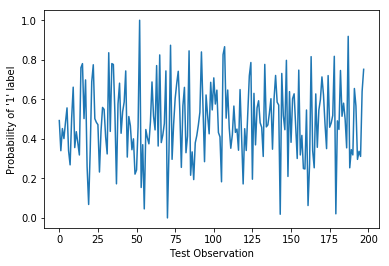

In [142]:
plt.ylabel('Probability of \'1\' label')
plt.xlabel('Test Observation')
plt.plot(Base.normalized_prob)
plt.savefig('foo.png', dpi=150)

In [143]:
Base.results

defaultdict(float,
            {(1.0, 0.0): 65.0,
             (1.0, 1.0): 54.0,
             (0.0, 0.0): 42.0,
             (0.0, 1.0): 37.0})

## Better Model

In [2]:
data = pd.read_csv('./data/Combined_News_DJIA.csv')
train = data[data['Date'] < '2015-01-01']
test = data[data['Date'] > '2014-12-31']

In [145]:
# randomize
Random_Data = DataSet.sample(frac=1)

# data split
TRAIN_SPLIT = 0.9

train = Random_Data[:int(len(Random_Data)*TRAIN_SPLIT)].reset_index(drop=True)
test = Random_Data[-(int(len(Random_Data)*(1-TRAIN_SPLIT))):].reset_index(drop=True)


In [146]:

trainheadlines = []
for row in range(0,len(train.index)):
    trainheadlines.append(' '.join(str(x) for x in train.iloc[row,2:27]))

In [147]:
trainheadlines[100]

'1.0 [\'country\', \'5\', \'high\', \'life\', \'low\', \'near\', \'top\', \'low\', \'crime\', \'drug\', \'abuse\', \'us\', \'china\'] [\'saudi\', \'found\', \'guilty\', \'london\'] [\'saudi\', \'king\', \'newspaper\', \'40\', \'women\', \'sex\', \'public\', \'since\', \'king\', \'power\', \'muslim\', \'female\'] [\'get\', \'porn\', \'enter\', \'australia\', "n\'t", \'give\', "n\'t"] [\'parliament\', \'attacked\'] [\'nobel\', \'peace\', \'prize\', \'chinese\', \'young\', \'people\', \'even\', \'party\', \'calling\', \'freedom\'] [\'first\', \'time\', \'ice\', \'train\', \'german\', \'london\', \'tuesday\', \'test\', \'run\', \'sign\', \'come\', \'france\'] [\'6\', \'10\', \'chinese\', \'demand\', \'norway\', \'percent\', \'year\', \'nobel\', \'peace\', \'prize\'] [\'two\', \'chinese\', \'arrested\', \'workers\', \'poor\', \'working\', \'conditions\'] [] [\'bin\', \'laden\', \'living\', \'pakistan\', \'says\', \'nato\', \'official\'] [\'ahmadinejad\', \'visit\', \'lebanon\', \'power\', \

In [6]:
from sklearn.feature_extraction.text import CountVectorizer
basicvectorizer = CountVectorizer()
basictrain = basicvectorizer.fit_transform(trainheadlines)
print(basictrain.shape)
print(basictrain.toarray())


(1611, 31675)
[[0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 2 0 ... 0 0 0]
 [0 2 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


### Logistic Regression

In [7]:
from sklearn.linear_model import LogisticRegression

In [8]:
basicmodel = LogisticRegression()
basicmodel = basicmodel.fit(basictrain, train["Label"])

In [10]:
from sklearn.metrics import accuracy_score
testheadlines = []
for row in range(0,len(test.index)):
    testheadlines.append(' '.join(str(x) for x in test.iloc[row,2:27]))
basictest = basicvectorizer.transform(testheadlines)
preds1 = basicmodel.predict(basictest)
acc1=accuracy_score(test['Label'], preds1)

In [11]:
print('Logic Regression 1 accuracy: ',acc1 )

Logic Regression 1 accuracy:  0.42592592592592593


In [12]:
basicwords = basicvectorizer.get_feature_names()
basiccoeffs = basicmodel.coef_.tolist()[0]
coeffdf = pd.DataFrame({'Word' : basicwords, 
                        'Coefficient' : basiccoeffs})
coeffdf = coeffdf.sort_values(['Coefficient', 'Word'], ascending=[0, 1])
coeffdf.head(5)

,Word,Coefficient
19419,nigeria,0.497924
25261,self,0.452526
29286,tv,0.428011
15998,korea,0.425863
20135,olympics,0.425716


### Logistic Regression 2: Tf-idf

In [76]:
from sklearn.feature_extraction.text import TfidfVectorizer
advancedvectorizer = TfidfVectorizer( min_df=0.0039, max_df=0.1, max_features = 200000, ngram_range = (4, 4))
advancedtrain = advancedvectorizer.fit_transform(trainheadlines)

In [77]:
print(advancedtrain.shape)

(1611, 313)


In [78]:
advancedmodel = LogisticRegression()
advancedmodel = advancedmodel.fit(advancedtrain, train["Label"])

In [79]:
testheadlines = []
for row in range(0,len(test.index)):
    testheadlines.append(' '.join(str(x) for x in test.iloc[row,2:27]))
advancedtest = advancedvectorizer.transform(testheadlines)
preds2 = advancedmodel.predict(advancedtest)
acc2=accuracy_score(test['Label'], preds2)

In [80]:
print('Logic Regression 2 accuracy: ', acc2)

Logic Regression 2 accuracy:  0.5238095238095238


In [81]:
advwords = advancedvectorizer.get_feature_names()
advcoeffs = advancedmodel.coef_.tolist()[0]
advcoeffdf = pd.DataFrame({'Words' : advwords, 
                        'Coefficient' : advcoeffs})
advcoeffdf = advcoeffdf.sort_values(['Coefficient', 'Words'], ascending=[0, 1])
advcoeffdf.head(5)

,Words,Coefficient
261,the united states to,1.336406
86,have the right to,1.299840
290,turn out to be,1.280977
35,bolivian president evo morales,1.199137
199,sentenced to death for,1.150593


In [82]:
advcoeffdf.tail(5)

,Words,Coefficient
253,the times of india,-0.906070
259,the united states has,-0.935390
276,to get rid of,-0.967044
122,in the us and,-0.980515
311,years in jail for,-1.277151


In [120]:
advancedvectorizer = TfidfVectorizer( min_df=0.001, max_df=0.99, max_features = 8000000, ngram_range = (3, 3))
advancedtrain = advancedvectorizer.fit_transform(trainheadlines)

In [121]:
print(advancedtrain.shape)

(1611, 35212)


In [122]:
from sklearn.ensemble import RandomForestClassifier
advancedmodel = RandomForestClassifier()
advancedmodel = advancedmodel.fit(advancedtrain, train["Label"])
testheadlines = []
for row in range(0,len(test.index)):
    testheadlines.append(' '.join(str(x) for x in test.iloc[row,2:27]))
advancedtest = advancedvectorizer.transform(testheadlines)
preds6 = advancedmodel.predict(advancedtest)
acc6 = accuracy_score(test['Label'], preds6)

In [123]:
print('RF 1 accuracy: ', acc6)

RF 1 accuracy:  0.5211640211640212


## LSTM

In [131]:
batch_size = 32
nb_classes = 2
advancedvectorizer = TfidfVectorizer( min_df=0.04, max_df=0.3, max_features = 200000, ngram_range = (2, 2))
advancedtrain = advancedvectorizer.fit_transform(trainheadlines)
testheadlines = []
for row in range(0,len(test.index)):
    testheadlines.append(' '.join(str(x) for x in test.iloc[row,2:27]))
advancedtest = advancedvectorizer.transform(testheadlines)
print(advancedtrain.shape)

(1611, 401)


In [132]:
X_train = advancedtrain.toarray()
X_test = advancedtest.toarray()

print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
y_train = np.array(train["Label"])
y_test = np.array(test["Label"])

X_train shape: (1611, 401)
X_test shape: (378, 401)


In [133]:
max_features = 10000
EMBEDDING_DIM = 100
VALIDATION_SPLIT = 0.1
maxlen = 200
batch_size = 32
nb_classes = 2

In [134]:
from keras.preprocessing.text import Tokenizer

# vectorize the text samples into a 2D integer tensor
tokenizer = Tokenizer(nb_words=max_features)
tokenizer.fit_on_texts(trainheadlines)
sequences_train = tokenizer.texts_to_sequences(trainheadlines)
sequences_test = tokenizer.texts_to_sequences(testheadlines)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/keras/preprocessing/text.py:172: UserWarning: The `nb_words` argument in `Tokenizer` has been renamed `num_words`.
  warnings.warn('The `nb_words` argument in `Tokenizer` '


In [135]:
from keras.preprocessing import sequence
from keras.utils import np_utils

print('Pad sequences (samples x time)')
X_train = sequence.pad_sequences(sequences_train, maxlen=maxlen)
X_test = sequence.pad_sequences(sequences_test, maxlen=maxlen)

Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)


print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)

Pad sequences (samples x time)
X_train shape: (1611, 200)
X_test shape: (378, 200)


In [141]:
from keras.models import Sequential
from keras.layers.embeddings import Embedding
from keras.layers.recurrent import LSTM
from keras.layers.core import Dense, Activation

print('Build model...')
model = Sequential()
model.add(Embedding(max_features, 128, dropout=0.2))
model.add(LSTM(128, dropout_W=0.2, dropout_U=0.2)) 
model.add(Dense(nb_classes))
model.add(Activation('softmax'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('Train...')
model.fit(X_train, Y_train, batch_size=batch_size, nb_epoch=10,
          validation_data=(X_test, Y_test))
score, acc = model.evaluate(X_test, Y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)


print("Generating test predictions...")
preds15 = model.predict_classes(X_test, verbose=0)
acc15 = accuracy_score(test['Label'], preds15)

Build model...


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: The `dropout` argument is no longer support in `Embedding`. You can apply a `keras.layers.SpatialDropout1D` layer right after the `Embedding` layer to get the same behavior.
  
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:9: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(128, dropout=0.2, recurrent_dropout=0.2)`
  if __name__ == '__main__':


Train...


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/keras/models.py:981: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 1611 samples, validate on 378 samples
Epoch 1/10
1611/1611 [==============================] - 14s 9ms/step - loss: 0.6918 - acc: 0.5289 - val_loss: 0.6973 - val_acc: 0.5079
Epoch 2/10
1611/1611 [==============================] - 13s 8ms/step - loss: 0.6196 - acc: 0.6511 - val_loss: 0.7099 - val_acc: 0.5794
Epoch 3/10
1611/1611 [==============================] - 15s 9ms/step - loss: 0.2629 - acc: 0.8951 - val_loss: 0.9444 - val_acc: 0.5185
Epoch 4/10
1611/1611 [==============================] - 15s 9ms/step - loss: 0.0649 - acc: 0.9851 - val_loss: 1.3301 - val_acc: 0.5370
Epoch 5/10
1611/1611 [==============================] - 14s 9ms/step - loss: 0.0143 - acc: 0.9963 - val_loss: 1.4155 - val_acc: 0.5344
Epoch 6/10
1611/1611 [==============================] - 14s 9ms/step - loss: 0.0045 - acc: 1.0000 - val_loss: 1.6761 - val_acc: 0.5635
Epoch 7/10
1611/1611 [==============================] - 14s 9ms/step - loss: 0.0033 - acc: 0.9994 - val_loss: 1.8303 - val_acc: 0.5582
Epoch 8/

In [ ]:
# Accessing elements
c = 0
for i,j in News.iterrows():
    c+=1
    print(j['Date'], j['News'])
    print(type(j['Date']), type(j['News']))
    #print('this is ',j)
    if c > 100: break

In [23]:
Comb = pd.read_csv('data/Combined_News_DJIA.csv')

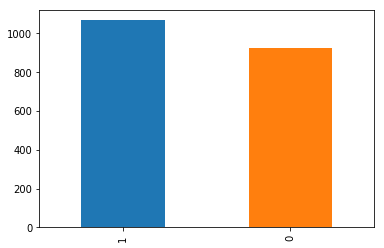

In [29]:
pd.value_counts(Comb['Label']).plot.bar()

In [37]:
Comb[:-7:-1]

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
1988,2016-07-01,1,A 117-year-old woman in Mexico City finally re...,IMF chief backs Athens as permanent Olympic host,"The president of France says if Brexit won, so...",British Man Who Must Give Police 24 Hours' Not...,100+ Nobel laureates urge Greenpeace to stop o...,Brazil: Huge spike in number of police killing...,Austria's highest court annuls presidential el...,"Facebook wins privacy case, can track any Belg...",...,"The United States has placed Myanmar, Uzbekist...",S&amp;P revises European Union credit rating t...,India gets $1 billion loan from World Bank for...,U.S. sailors detained by Iran spoke too much u...,Mass fish kill in Vietnam solved as Taiwan ste...,Philippines president Rodrigo Duterte urges pe...,Spain arrests three Pakistanis accused of prom...,"Venezuela, where anger over food shortages is ...",A Hindu temple worker has been killed by three...,Ozone layer hole seems to be healing - US &amp...
1987,2016-06-30,1,Jamaica proposes marijuana dispensers for tour...,Stephen Hawking says pollution and 'stupidity'...,Boris Johnson says he will not run for Tory pa...,Six gay men in Ivory Coast were abused and for...,Switzerland denies citizenship to Muslim immig...,Palestinian terrorist stabs israeli teen girl ...,Puerto Rico will default on $1 billion of debt...,Republic of Ireland fans to be awarded medal f...,...,Googles free wifi at Indian railway stations i...,Mounting evidence suggests 'hobbits' were wipe...,The men who carried out Tuesday's terror attac...,Calls to suspend Saudi Arabia from UN Human Ri...,More Than 100 Nobel Laureates Call Out Greenpe...,British pedophile sentenced to 85 years in US ...,"US permitted 1,200 offshore fracks in Gulf of ...",We will be swimming in ridicule - French beach...,UEFA says no minutes of silence for Istanbul v...,Law Enforcement Sources: Gun Used in Paris Ter...
1986,2016-06-29,1,Explosion At Airport In Istanbul,Yemeni former president: Terrorism is the offs...,UK must accept freedom of movement to access E...,Devastated: scientists too late to captive bre...,British Labor Party leader Jeremy Corbyn loses...,A Muslim Shop in the UK Was Just Firebombed Wh...,Mexican Authorities Sexually Torture Women in ...,UK shares and pound continue to recover,...,"Escape Tunnel, Dug by Hand, Is Found at Holoca...",The land under Beijing is sinking by as much a...,Car bomb and Anti-Islamic attack on Mosque in ...,Emaciated lions in Taiz Zoo are trapped in blo...,Rupert Murdoch describes Brexit as 'wonderful'...,More than 40 killed in Yemen suicide attacks,Google Found Disastrous Symantec and Norton Vu...,Extremist violence on the rise in Germany: Dom...,BBC News: Labour MPs pass Corbyn no-confidence...,Tiny New Zealand town with 'too many jobs' lau...
1985,2016-06-28,1,"2,500 Scientists To Australia: If You Want To ...","The personal details of 112,000 French police ...",S&amp;P cuts United Kingdom sovereign credit r...,Huge helium deposit found in Africa,CEO of the South African state broadcaster qui...,"Brexit cost investors $2 trillion, the worst o...",Hong Kong democracy activists call for return ...,Brexit: Iceland president says UK can join 'tr...,...,"US, Canada and Mexico pledge 50% of power from...",There is increasing evidence that Australia is...,"Richard Branson, the founder of Virgin Group, ...","37,000-yr-old skull from Borneo reveals surpri...",Palestinians stone Western Wall worshipers; po...,Jean-Claude Juncker asks Farage: Why are you h...,"""Romanians for Remainians"" offering a new home...",Brexit: Gibraltar in talks with Scotland to st...,8 Suicide Bombers Strike Lebanon,Mexico's security forces routinely use 'sexual...
1984,2016-06-27,0,Barclays and RBS shares suspended from trading...,Pope says Church should ask forgiveness from g...,Poland 'shocked' by xenophobic abuse of Poles ...,"There will be no second referendum, cabinet ag...","Scotland we

In [39]:
Stock[:7]

,Date,Open,High,Low,Close,Volume,Adj Close
0,2016-07-01,17924.240234,18002.380859,17916.910156,17949.369141,82160000,17949.369141
1,2016-06-30,17712.759766,17930.609375,17711.800781,17929.990234,133030000,17929.990234
2,2016-06-29,17456.019531,17704.509766,17456.019531,17694.679688,106380000,17694.679688
3,2016-06-28,17190.509766,17409.720703,17190.509766,17409.720703,112190000,17409.720703
4,2016-06-27,17355.210938,17355.210938,17063.080078,17140.240234,138740000,17140.240234
5,2016-06-24,17946.630859,17946.630859,17356.339844,17400.750000,239000000,17400.750000
6,2016-06-23,17844.109375,18011.070312,17844.109375,18011.070312,98070000,18011.070312
